## Example of an artificial neural network in classifying an image of a raccoon.
#### Author: Ithallo J. A. Guimarães    Aug/2016
#### Edited Apr/2018

In [34]:
from sklearn.neural_network import MLPClassifier
from scipy import misc # must be installed in order to read the images
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import datetime

### Loading images

In [20]:
#loading images
y1 = misc.imread('./set/r1.png')
y2 = misc.imread('./set/r2.png')
y3 = misc.imread('./set/r3.png')
y4 = misc.imread('./set/r4.png')
n1 = misc.imread('./set/not1.png')
n2 = misc.imread('./set/not2.png')
me = misc.imread('./set/dog.png')
y5 = misc.imread('./set/r5.png')
y6 = misc.imread('./set/r6.png')
raw_inputs = [np.array(y1[:,:,0]), np.array(y2[:,:,0]), np.array(y3[:,:,0]),
              np.array(y4[:,:,0]), np.array(n1[:,:,0]), np.array(n2[:,:,0]),
              np.array(me[:,:,0]), np.array(y5[:,:,0]), np.array(y6[:,:,0])]
for i in raw_inputs:
    print i.shape

(1080, 1280)
(350, 640)
(394, 500)
(183, 275)
(233, 350)
(183, 275)
(342, 351)
(650, 575)
(425, 600)


### Showing loaded images

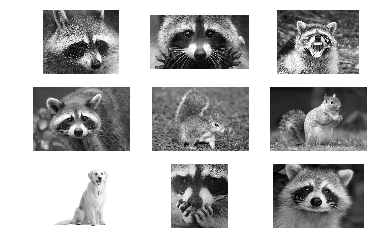

In [89]:
%matplotlib inline
n = 331
for i in raw_inputs:
    plt.subplot(n)
    plt.imshow(i, cmap="gray")
    plt.axis('off')
    n=n+1
plt.show()
   

### Preprocessing

In [59]:
def new_img(photo, r=150, c=150):
    new = []
    otp = []
    rows = np.linspace(0,photo.shape[0],r).astype(int)
    columns = np.linspace(0,photo.shape[1], c).astype(int)
    for  i in rows-1:
        for j in columns-1:
            new.append(photo[i,j])
        otp.append([new]) 
        new = []
    #scales for converging in an easier way
    return np.hstack(otp).astype("float64")
#reducing images to only 150x150 pixels
X =[]
for i in raw_inputs:
    X.append(new_img(i))

X = np.vstack(X)
y = [1., 1., 1., 1., 0., 0., 0., 1., 1.]

print X.shape, len(y)

(9, 22500) 9


### Training/Loading model

In [68]:
#load from file or run, run is for when you already have a model finished
ans = 'run'

if ans == 'run':
    #yes, a lot of layers
    st = datetime.datetime.now()
    print "Starting at", st
    clf = MLPClassifier(algorithm='l-bfgs', alpha=0.1, hidden_layer_sizes=(500,300,), random_state=1,
                    verbose=True, max_iter=1000, shuffle= False)
    clf.fit(X, y)
    fi = datetime.datetime.now()
    print "Ending at", fi 
    print "Total time spent:", fi - st 

else:
    #Load it from here, and use it back, now using joblib
    clf = joblib.load("raccoon.ann")
    print"Loaded from file"

Starting at 2018-04-11 18:53:16.312838
Ending at 2018-04-11 19:00:15.665432
Total time spent: 0:06:59.352594


### 'Fake' accuracy (comes from training dataset because I was lazy and means very little)

In [69]:
results = clf.predict(X)
for i in results:
    if i== 1:
        print"It's a raccoon!"
    else:
        print"It's not a raccoon :I"
print"Accuracy:", clf.score(X, y) 

It's a raccoon!
It's a raccoon!
It's a raccoon!
It's a raccoon!
It's not a raccoon :I
It's not a raccoon :I
It's not a raccoon :I
It's a raccoon!
It's a raccoon!
Accuracy: 1.0


### Showing actual results and meaningful things

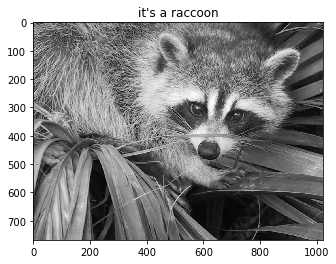

In [70]:

w1 =  misc.imread('./set/face.png')[:,:,0]
plt.imshow(w1, cmap=plt.cm.gray)
if clf.predict(new_img(w1))== 1: plt.title("it's a raccoon")
else: plt.title(" It's not a raccoon")

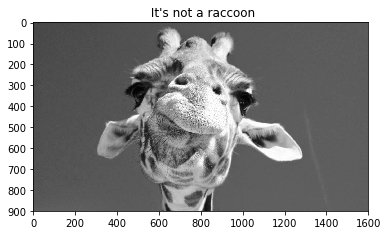

In [71]:
plt.imshow(misc.imread('./set/giraffe.png')[:,:,0], cmap=plt.cm.gray)    
if clf.predict(new_img(misc.imread('./set/giraffe.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

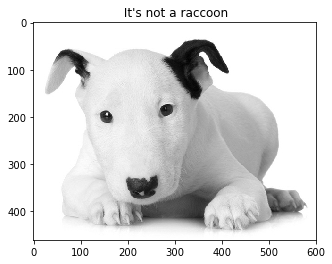

In [72]:
plt.imshow(misc.imread('./set/bt.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/bt.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")
    

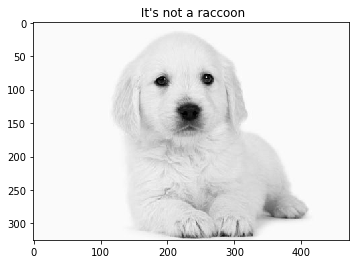

In [73]:
plt.imshow(misc.imread('./set/dog1.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/dog1.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

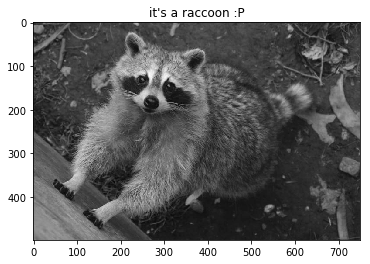

In [74]:
plt.imshow(misc.imread('./set/r7.png')[:,:,0], cmap=plt.cm.gray)
if clf.predict(new_img(misc.imread('./set/r7.png')[:,:,0]))== 1: plt.title("it's a raccoon :P")
else: plt.title(" It's not a raccoon")

## Saving to file for later use

In [75]:
#Save ANN to file, now with joblib, that is more efficient
ans = "save"
if ans == 'save':    
    joblib.dump(clf, "raccoon.ann",compress=True)
    print'saved'
else: print'Nothing to save'

saved


### Saving the inner filters of the MLP (too many to show)
#### Go to mlp_images folder to see

In [80]:
# the input layer acts like a 'filter', showing incredible images
weights = clf.coefs_
print len(weights), weights[0].shape, weights[1].shape, weights[2].shape
old_shape = (150,150)

3 (22500, 500) (500, 300) (300, 1)


In [81]:
for i in xrange(weights[0].shape[1]):
    plt.imsave("mlp_images/fig_%s.png"%i, weights[0][:, i].reshape(old_shape), cmap="gray")
print "All images saved"

All images saved


Showing some


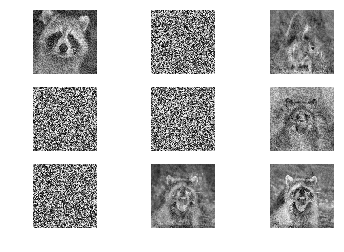

In [104]:
print "Showing some"
a = 331
for i in range(0 , weights[0].shape[1], (weights[0].shape[1]/8) ):
    plt.subplot(a)
    plt.imshow(weights[0][:, i].reshape(old_shape), cmap="gray")
    plt.axis('off')
    a = a + 1
plt.show()

